<a href="https://colab.research.google.com/github/vadim-privalov/Sorevnovania/blob/main/%D0%94%D0%BE%D0%BC%D0%B0_%D0%9A%D0%B0%D0%B3%D0%B3%D0%BB%D0%B5_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.models import Sequential, load_model # Подлючаем класс создания модели Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization # Подключаем класс Dense - полносвязный слой, и Flatten - данные выстраиваем в линию, одномерные
from tensorflow.keras.optimizers import Adam # Подключаем оптимизатор Adam
from tensorflow.keras import utils #Утилиты для to_categorical

import tensorflow as tf # импортируем tensorflow

# sklearn - популярная библиотека для машинного обучения
# train_test_split - функция разделения на обучающую и проверочную/тестовую выборку
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix # для построения матрицы ошибок
from sklearn.preprocessing import StandardScaler, MinMaxScaler  # для нормализации данных

import numpy as np # Подключаем библиотеку numpy
import pandas as pd # Библиотека pandas

import matplotlib.pyplot as plt #Отрисовка изображений
from PIL import Image #Отрисовка изображений

#Отрисовывать изображения в ноутбуке, а не в консоль или файл
%matplotlib inline

In [ ]:
#запускаем - подключаем Google Drive - будем скачивать с него, т.к. намного быстрее
#после запуска переходим по ссылке, которая появится, для идентификации
#копируем оттуда код authorization code и вставляем здесь в окошко
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_house = pd.read_csv('/content/drive/MyDrive/datasets/house-prices-advanced-regression-techniques/train.csv') # загружаем базу данных Домов.

In [ ]:
df_house.head() # выведем первые пять строк, для того, что бы удостовериться, о корректности загрузки.

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
test = pd.read_csv('/content/drive/MyDrive/datasets/house-prices-advanced-regression-techniques/test.csv') # загружаем базу данных Тест.

In [ ]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,Comp

In [ ]:
columns = df_house.columns.tolist() # выведем названия столбцов, что бы их потом переименовать
columns

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

In [ ]:
# Переменуем столбцы
df_house=df_house.rename(columns={'Exterior1st':'Наружное_покрытие_дома', 'Exterior2nd':'Наружное_покрытие_дома_2', 'MasVnrType':'Тип_облицовки_кладки',
                                  'MasVnrArea':'Площадь_облицовки_каменной_кладкой', 'ExterQual':'Качество_наружных_материалов', 'ExterCond':'Текущее_состояние_материала_снаружи',
                                  'Foundation':'Фундамент', 'BsmtQual':'Высота_подвала', 'BsmtCond':'Состояние_подвала', 'BsmtExposure':'Выход_на_уровне_сада',
                                  'BsmtFinType1':'Качсетво_готового_подвала', 'BsmtFinSF1':'Площадь_готового_подвала', 'BsmtFinType2':'Качество_готового_подвала2',
                                  'BsmtFinSF2':'Площадь_готового_подвла2', 'BsmtUnfSF':'Площадь_не_готового_подвла', 'TotalBsmtSF':'Общая_Площадь_подвала',
                                  'Heating':'Отопление', 'HeatingQC':'Сосотояние_Отопления', 'CentralAir':'Центральный_кондиционер', 'Electrical':'Электричество',
                                  '1stFlrSF':'Площадь_1этажа', '2ndFlrSF':'Площадь_2этажа', 'LowQualFinSF':'Площадь_без_отделки', 'GrLivArea':'Площадь_выше_земли',
                                  'BsmtFullBath':'Ванная_на_цоколе', 'BsmtHalfBath':'Душ_цоколь', 'FullBath':'Ванна_в_доме', 'HalfBath':'Душ_в_доме', 'BedroomAbvGr':'Количество_спален_цоколь',
                                  'KitchenAbvGr':'Кухни', 'KitchenQual':'Качество_кухни', 'TotRmsAbvGrd':'Количество_комнат_дом', 'Functional':'Рейтинг_функциональности_дом',
                                  'Fireplaces':'Камин', 'FireplaceQu':'Качество_камина', 'GarageType': 'Тип_гаража', 'GarageYrBlt':'Год_гаража', 'GarageFinish':'Отделка_гаража',
                                  'GarageCars':'Мест_в_гараже', 'GarageArea':'Площадь_гараж', 'GarageQual':'Качество_гаража', 'GarageCond':'Состояние_гаража', 'PavedDrive':'Твердая_дорога',
                                  'WoodDeckSF':'Площадь_деревянного_настила', 'OpenPorchSF':'Площадь_открытой_веранды', 'EnclosedPorch':'Площадь_закрытого_крыльца',
                                  '3SsnPorch':'Площадь_кльца_3сезона', 'ScreenPorch':'Площадь_крыльца', 'PoolArea':'Площадь_бассейн', 'PoolQC':'Качесттво_бассейн', 'Fence':'Забор',
                                  'MiscFeature':'Иные_функции', 'MiscVal':'Значение_инфх_функций', 'MoSold':'Месяц_продаж', 'YrSold':'Год_продаж', 'SaleType':'Тип_продаж',
                                  'SaleCondition':'Состояние_продажи', 'SalePrice':'Цена'})

In [ ]:
df_house=df_house.rename(columns={'MSSubClass':'Класс_здания', 'MSZoning':'Класс_зонирования', 'LotFrontage':'Количество_подьездов_кзданию', 'LotArea':'Размер_подьезда',
                                  'Street':'Тип_улицы', 'Alley':'Аллея', 'LotShape':'Форма_здания', 'LandContour':'Выровненность_здания', 'Utilities':'Наличие_утилит',
                                  'LotConfig':'Конфигурация', 'LandSlope':'Наличие_склона', 'Neighborhood':'Район', 'Condition1':'Близость_к_дороге1', 'Condition2':'Близость_к_дороге2',
                                  'BldgType':'Тип_жилья', 'HouseStyle':'Тип_дома', 'OverallQual':'Качество_отделки', 'OverallCond':'Общее_состояние', 'YearBuilt':'Год_постройки',
                                  'YearRemodAdd':'Год_ремонта', 'RoofStyle':'Тип_крыши', 'RoofMatl':'Материал_крыши'})

In [ ]:
df_house

,Id,Класс_здания,Класс_зонирования,Количество_подьездов_кзданию,Размер_подьезда,Тип_улицы,Аллея,Форма_здания,Выровненность_здания,Наличие_утилит,Конфигурация,Наличие_склона,Район,Близость_к_дороге1,Близость_к_дороге2,Тип_жилья,Тип_дома,Качество_отделки,Общее_состояние,Год_постройки,Год_ремонта,Тип_крыши,Материал_крыши,Наружное_покрытие_дома,Наружное_покрытие_дома_2,Тип_облицовки_кладки,Площадь_облицовки_каменной_кладкой,Качество_наружных_материалов,Текущее_состояние_материала_снаружи,Фундамент,Высота_подвала,Состояние_подвала,Выход_на_уровне_сада,Качсетво_готового_подвала,Площадь_готового_подвала,Качество_готового_подвала2,Площадь_готового_подвла2,Площадь_не_готового_подвла,Общая_Площадь_подвала,Отопление,...,Центральный_кондиционер,Электричество,Площадь_1этажа,Площадь_2этажа,Площадь_без_отделки,Площадь_выше_земли,Ванная_на_цоколе,Душ_цоколь,Ванна_в_доме,Душ_в_доме,Количество_спален_цоколь,Кухни,Качество_кухни,Количество_комнат_дом,Рейтинг_функциональности_дом,Камин,Качество_камина,Тип_гаража,Год_гаража,Отделка_гаража,Мест_в_гараже,Площадь_гараж,Качество_гаража,Состояние_гаража,Твердая_дорога,Площадь_деревянного_настила,Площадь_открытой_веранды,Площадь_закрытого_крыльца,Площадь_кльца_3сезона,Площадь_крыльца,Площадь_бассейн,Качесттво_бассейн,Забор,Иные_функции,Значение_инфх_функций,Месяц_продаж,Год_продаж,Тип_продаж,Состояние_продажи,Цена
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,...,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,...,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,

In [ ]:
# Переменуем столбцы
test=test.rename(columns={'Exterior1st':'Наружное_покрытие_дома', 'Exterior2nd':'Наружное_покрытие_дома_2', 'MasVnrType':'Тип_облицовки_кладки',
                                  'MasVnrArea':'Площадь_облицовки_каменной_кладкой', 'ExterQual':'Качество_наружных_материалов', 'ExterCond':'Текущее_состояние_материала_снаружи',
                                  'Foundation':'Фундамент', 'BsmtQual':'Высота_подвала', 'BsmtCond':'Состояние_подвала', 'BsmtExposure':'Выход_на_уровне_сада',
                                  'BsmtFinType1':'Качсетво_готового_подвала', 'BsmtFinSF1':'Площадь_готового_подвала', 'BsmtFinType2':'Качество_готового_подвала2',
                                  'BsmtFinSF2':'Площадь_готового_подвла2', 'BsmtUnfSF':'Площадь_не_готового_подвла', 'TotalBsmtSF':'Общая_Площадь_подвала',
                                  'Heating':'Отопление', 'HeatingQC':'Сосотояние_Отопления', 'CentralAir':'Центральный_кондиционер', 'Electrical':'Электричество',
                                  '1stFlrSF':'Площадь_1этажа', '2ndFlrSF':'Площадь_2этажа', 'LowQualFinSF':'Площадь_без_отделки', 'GrLivArea':'Площадь_выше_земли',
                                  'BsmtFullBath':'Ванная_на_цоколе', 'BsmtHalfBath':'Душ_цоколь', 'FullBath':'Ванна_в_доме', 'HalfBath':'Душ_в_доме', 'BedroomAbvGr':'Количество_спален_цоколь',
                                  'KitchenAbvGr':'Кухни', 'KitchenQual':'Качество_кухни', 'TotRmsAbvGrd':'Количество_комнат_дом', 'Functional':'Рейтинг_функциональности_дом',
                                  'Fireplaces':'Камин', 'FireplaceQu':'Качество_камина', 'GarageType': 'Тип_гаража', 'GarageYrBlt':'Год_гаража', 'GarageFinish':'Отделка_гаража',
                                  'GarageCars':'Мест_в_гараже', 'GarageArea':'Площадь_гараж', 'GarageQual':'Качество_гаража', 'GarageCond':'Состояние_гаража', 'PavedDrive':'Твердая_дорога',
                                  'WoodDeckSF':'Площадь_деревянного_настила', 'OpenPorchSF':'Площадь_открытой_веранды', 'EnclosedPorch':'Площадь_закрытого_крыльца',
                                  '3SsnPorch':'Площадь_кльца_3сезона', 'ScreenPorch':'Площадь_крыльца', 'PoolArea':'Площадь_бассейн', 'PoolQC':'Качесттво_бассейн', 'Fence':'Забор',
                                  'MiscFeature':'Иные_функции', 'MiscVal':'Значение_инфх_функций', 'MoSold':'Месяц_продаж', 'YrSold':'Год_продаж', 'SaleType':'Тип_продаж',
                                  'SaleCondition':'Состояние_продажи'})

In [ ]:
test=test.rename(columns={'MSSubClass':'Класс_здания', 'MSZoning':'Класс_зонирования', 'LotFrontage':'Количество_подьездов_кзданию', 'LotArea':'Размер_подьезда',
                                  'Street':'Тип_улицы', 'Alley':'Аллея', 'LotShape':'Форма_здания', 'LandContour':'Выровненность_здания', 'Utilities':'Наличие_утилит',
                                  'LotConfig':'Конфигурация', 'LandSlope':'Наличие_склона', 'Neighborhood':'Район', 'Condition1':'Близость_к_дороге1', 'Condition2':'Близость_к_дороге2',
                                  'BldgType':'Тип_жилья', 'HouseStyle':'Тип_дома', 'OverallQual':'Качество_отделки', 'OverallCond':'Общее_состояние', 'YearBuilt':'Год_постройки',
                                  'YearRemodAdd':'Год_ремонта', 'RoofStyle':'Тип_крыши', 'RoofMatl':'Материал_крыши'})

In [ ]:
test

,Id,Класс_здания,Класс_зонирования,Количество_подьездов_кзданию,Размер_подьезда,Тип_улицы,Аллея,Форма_здания,Выровненность_здания,Наличие_утилит,Конфигурация,Наличие_склона,Район,Близость_к_дороге1,Близость_к_дороге2,Тип_жилья,Тип_дома,Качество_отделки,Общее_состояние,Год_постройки,Год_ремонта,Тип_крыши,Материал_крыши,Наружное_покрытие_дома,Наружное_покрытие_дома_2,Тип_облицовки_кладки,Площадь_облицовки_каменной_кладкой,Качество_наружных_материалов,Текущее_состояние_материала_снаружи,Фундамент,Высота_подвала,Состояние_подвала,Выход_на_уровне_сада,Качсетво_готового_подвала,Площадь_готового_подвала,Качество_готового_подвала2,Площадь_готового_подвла2,Площадь_не_готового_подвла,Общая_Площадь_подвала,Отопление,Сосотояние_Отопления,Центральный_кондиционер,Электричество,Площадь_1этажа,Площадь_2этажа,Площадь_без_отделки,Площадь_выше_земли,Ванная_на_цоколе,Душ_цоколь,Ванна_в_доме,Душ_в_доме,Количество_спален_цоколь,Кухни,Качество_кухни,Количество_комнат_дом,Рейтинг_функциональности_дом,Камин,Качество_камина,Тип_гаража,Год_гаража,Отделка_гаража,Мест_в_гараже,Площадь_гараж,Качество_гаража,Состояние_гаража,Твердая_дорога,Площадь_деревянного_настила,Площадь_открытой_веранды,Площадь_закрытого_крыльца,Площадь_кльца_3сезона,Площадь_крыльца,Площадь_бассейн,Качесттво_бассейн,Забор,Иные_функции,Значение_инфх_функций,Месяц_продаж,Год_продаж,Тип_продаж,Состояние_продажи
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970

In [ ]:
df_house.info() # Проверяем значение каждой колонки должны иметь заданный тип данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Id                                   1460 non-null   int64  
 1   Класс_здания                         1460 non-null   int64  
 2   Класс_зонирования                    1460 non-null   object 
 3   Количество_подьездов_кзданию         1201 non-null   float64
 4   Размер_подьезда                      1460 non-null   int64  
 5   Тип_улицы                            1460 non-null   object 
 6   Аллея                                91 non-null     object 
 7   Форма_здания                         1460 non-null   object 
 8   Выровненность_здания                 1460 non-null   object 
 9   Наличие_утилит                       1460 non-null   object 
 10  Конфигурация                         1460 non-null   object 
 11  Наличие_склона                

In [ ]:
df_house.isna().sum() # Для начала выясним, количество незаполненных ячеек и что делать с пропущенными значениями.

Id                                0
Класс_здания                      0
Класс_зонирования                 0
Количество_подьездов_кзданию    259
Размер_подьезда                   0
                               ... 
Месяц_продаж                      0
Год_продаж                        0
Тип_продаж                        0
Состояние_продажи                 0
Цена                              0
Length: 81, dtype: int64

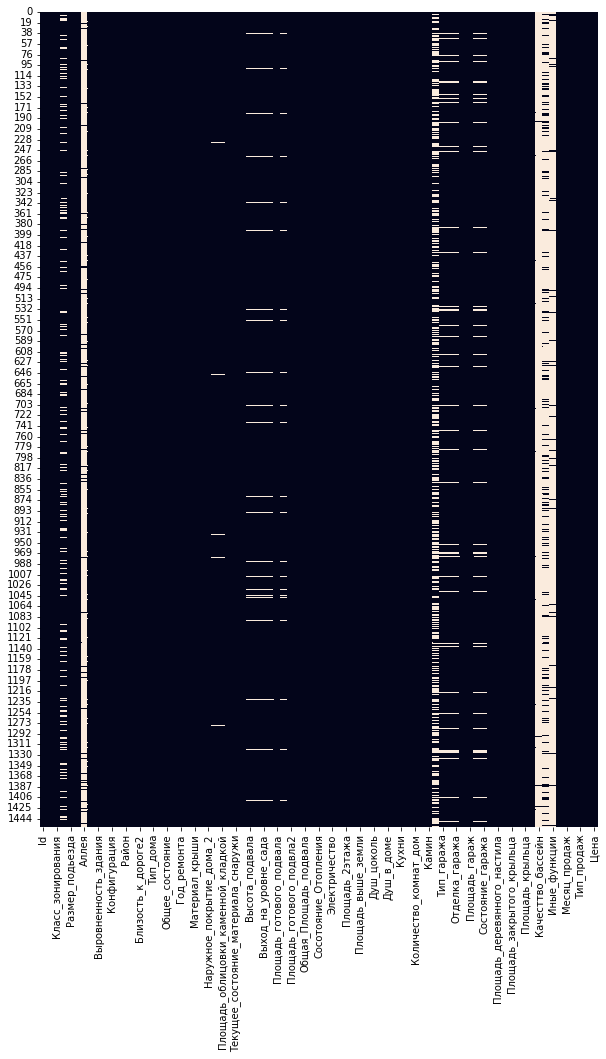

In [ ]:
import seaborn as sns
from matplotlib.pyplot import figure
figure(figsize = (10, 15))
sns.heatmap(df_house.isnull(), cbar=False)

In [ ]:
df_house.drop(['Качесттво_бассейн', 'Аллея', 'Иные_функции', 'Значение_инфх_функций'], axis=1, inplace=True) # удаляем столбецы

In [ ]:
test.drop(['Качесттво_бассейн', 'Аллея', 'Иные_функции', 'Значение_инфх_функций'], axis=1, inplace=True) # удаляем столбецы

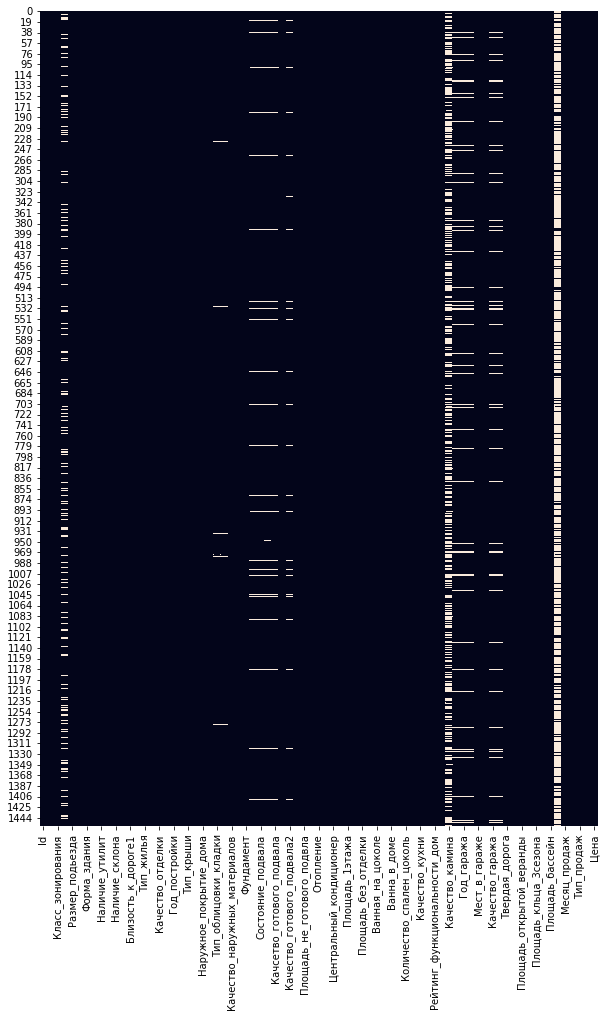

In [ ]:
import seaborn as sns
from matplotlib.pyplot import figure
figure(figsize = (10, 15))
sns.heatmap(df_house.isnull(), cbar=False)

In [ ]:
df_house.describe() # Проверяем числовые значения и даты, проверяем на предмет нахождения в границах "допустимых значений"

,Id,Класс_здания,Количество_подьездов_кзданию,Размер_подьезда,Качество_отделки,Общее_состояние,Год_постройки,Год_ремонта,Площадь_облицовки_каменной_кладкой,Площадь_готового_подвала,Площадь_готового_подвла2,Площадь_не_готового_подвла,Общая_Площадь_подвала,Площадь_1этажа,Площадь_2этажа,Площадь_без_отделки,Площадь_выше_земли,Ванная_на_цоколе,Душ_цоколь,Ванна_в_доме,Душ_в_доме,Количество_спален_цоколь,Кухни,Количество_комнат_дом,Камин,Год_гаража,Мест_в_гараже,Площадь_гараж,Площадь_деревянного_настила,Площадь_открытой_веранды,Площадь_закрытого_крыльца,Площадь_кльца_3сезона,Площадь_крыльца,Площадь_бассейн,Месяц_продаж,Год_продаж,Цена
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,12.000000,2010.000000,755000.000000


In [ ]:
df_house.info() # Проверяем значение каждой колонки должны иметь заданный тип данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Id                                   1460 non-null   int64  
 1   Класс_здания                         1460 non-null   int64  
 2   Класс_зонирования                    1460 non-null   object 
 3   Количество_подьездов_кзданию         1201 non-null   float64
 4   Размер_подьезда                      1460 non-null   int64  
 5   Тип_улицы                            1460 non-null   object 
 6   Форма_здания                         1460 non-null   object 
 7   Выровненность_здания                 1460 non-null   object 
 8   Наличие_утилит                       1460 non-null   object 
 9   Конфигурация                         1460 non-null   object 
 10  Наличие_склона                       1460 non-null   object 
 11  Район                         

In [ ]:
columns_list = df_house.columns # сформируем  список столбцов
print(columns_list[10]) # выведем наименование столбца № 10

Наличие_склона


In [ ]:
n_l = 71 # проанализируем некоторые значения колонок по номеру столбца
print(columns_list[n_l], 'уникальных значений ',df_house.iloc[:,n_l].nunique())
df_house.iloc[:,n_l].unique()

Забор уникальных значений  4


array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [ ]:
# Заполняем колонки с пустыми значениями.
maskValue = df_house.iloc[:,-6].isna() # создаем маску с пустыми значениями для колонки "Забор"
df_val = df_house.loc[maskValue,:] # создаем вспомогательным датафрейм
print(df_val.shape) # выведем размерность этого датафрейма
df_val.head(10) # выведем на экран строки с пустыми значениями для колонки "Забор"

(1179, 77)


,Id,Класс_здания,Класс_зонирования,Количество_подьездов_кзданию,Размер_подьезда,Тип_улицы,Форма_здания,Выровненность_здания,Наличие_утилит,Конфигурация,Наличие_склона,Район,Близость_к_дороге1,Близость_к_дороге2,Тип_жилья,Тип_дома,Качество_отделки,Общее_состояние,Год_постройки,Год_ремонта,Тип_крыши,Материал_крыши,Наружное_покрытие_дома,Наружное_покрытие_дома_2,Тип_облицовки_кладки,Площадь_облицовки_каменной_кладкой,Качество_наружных_материалов,Текущее_состояние_материала_снаружи,Фундамент,Высота_подвала,Состояние_подвала,Выход_на_уровне_сада,Качсетво_готового_подвала,Площадь_готового_подвала,Качество_готового_подвала2,Площадь_готового_подвла2,Площадь_не_готового_подвла,Общая_Площадь_подвала,Отопление,Сосотояние_Отопления,Центральный_кондиционер,Электричество,Площадь_1этажа,Площадь_2этажа,Площадь_без_отделки,Площадь_выше_земли,Ванная_на_цоколе,Душ_цоколь,Ванна_в_доме,Душ_в_доме,Количество_спален_цоколь,Кухни,Качество_кухни,Количество_комнат_дом,Рейтинг_функциональности_дом,Камин,Качество_камина,Тип_гаража,Год_гаража,Отделка_гаража,Мест_в_гараже,Площадь_гараж,Качество_гаража,Состояние_гаража,Твердая_дорога,Площадь_деревянного_настила,Площадь_открытой_веранды,Площадь_закрытого_крыльца,Площадь_кльца_3сезона,Площадь_крыльца,Площадь_бассейн,Забор,Месяц_продаж,Год_продаж,Тип_продаж,Состояние_продажи,Цена
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,12,2008,WD,Normal,250000
6,7,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,

In [ ]:
df_house[(df_house.iloc[:,1] == 60) & (df_house.iloc[:,11] == 'CollgCr') & (df_house.iloc[:,16] == 7)]
# вручную проверим есть ли значения идентичные первой строке предыдущей таблицы, как видим есть точное совпадение можно взять значение "Объем"

,Id,Класс_здания,Класс_зонирования,Количество_подьездов_кзданию,Размер_подьезда,Тип_улицы,Форма_здания,Выровненность_здания,Наличие_утилит,Конфигурация,Наличие_склона,Район,Близость_к_дороге1,Близость_к_дороге2,Тип_жилья,Тип_дома,Качество_отделки,Общее_состояние,Год_постройки,Год_ремонта,Тип_крыши,Материал_крыши,Наружное_покрытие_дома,Наружное_покрытие_дома_2,Тип_облицовки_кладки,Площадь_облицовки_каменной_кладкой,Качество_наружных_материалов,Текущее_состояние_материала_снаружи,Фундамент,Высота_подвала,Состояние_подвала,Выход_на_уровне_сада,Качсетво_готового_подвала,Площадь_готового_подвала,Качество_готового_подвала2,Площадь_готового_подвла2,Площадь_не_готового_подвла,Общая_Площадь_подвала,Отопление,Сосотояние_Отопления,Центральный_кондиционер,Электричество,Площадь_1этажа,Площадь_2этажа,Площадь_без_отделки,Площадь_выше_земли,Ванная_на_цоколе,Душ_цоколь,Ванна_в_доме,Душ_в_доме,Количество_спален_цоколь,Кухни,Качество_кухни,Количество_комнат_дом,Рейтинг_функциональности_дом,Камин,Качество_камина,Тип_гаража,Год_гаража,Отделка_гаража,Мест_в_гараже,Площадь_гараж,Качество_гаража,Состояние_гаража,Твердая_дорога,Площадь_деревянного_настила,Площадь_открытой_веранды,Площадь_закрытого_крыльца,Площадь_кльца_3сезона,Площадь_крыльца,Площадь_бассейн,Забор,Месяц_продаж,Год_продаж,Тип_продаж,Состояние_продажи,Цена
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,2,2008,WD,Normal,208500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,9,2008,WD,Normal,223500
57,58,60,RL,89.0,11645,Pave,IR1,Lvl,AllPub,Corner,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2004,2004,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,860,860,GasA,Ex,Y,SBrkr,860,860,0,1720,0,0,2,1,3,1,Gd,7,Typ,0,NaN,Attchd,2004.0,RFn,2,565,TA,TA,Y,0,70,0,0,0,0,NaN,8,2006,WD,Normal,196500
64,65,60,RL,NaN,9375,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,573.0,TA,TA,PConc,Gd,TA,No,GLQ,739,Unf,0,318,1057,GasA,Ex,Y,SBrkr,1057,977,0,2034,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,1998.0,RFn,2,645,TA,TA,Y,576,36,0,0,0,0,GdPrv,2,2009,WD,Normal,219500
112,113,60,RL,77.0,9965,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,220.0,Gd,TA,PConc,Ex,TA,Av,GLQ,984,Unf,0,280,1264,GasA,Ex,Y,SBrkr,1282,1414,0,2696,1,0,2,1,4,1,Ex,10,Typ,1,Gd,BuiltIn,2007.0,Fin,3,792,TA,TA,Y,120,184,0,0,168,0,NaN,10,2007,New,Partial,383970
248,249,60,RL,72.0,11317,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,101.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,840,840,GasA,Ex,Y,SBrkr,840,828,0,1668,0,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,500,TA,TA,Y,144,68,0,0,0,0,NaN,9,2007,WD,Normal,180000
258,259,60,RL,80.0,12435,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2001,Gable,CompShg,VinylSd,VinylSd,BrkFace,172.0,Gd,TA,PConc,Gd,TA,No,GLQ,361,Unf,0,602,963,GasA,Ex,Y,SBrkr,963,829,0,1792,0,0,2,1,3,1,Gd,7,Typ,1,TA,Attchd,2001.0,RFn,2,564,TA,TA,Y,0,96,0,245,0,0,NaN,5,2008,WD,Normal,231500
374,375,60,RL,65.0,8200,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2004,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,847,847,GasA,Ex,Y,SBrkr,847,1081,0,1928,0,0,2,1,4,1,Gd,8,Typ,1,Gd,BuiltIn,2003.0,Fin,2,434,TA,TA,Y,100,48,0,0,0,0,NaN,7,2007,WD,Normal,219500
382,383,60,RL,79.0,9245,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,

In [ ]:
#  Забор
colum_num = 71
# создадим вспомогательную функцию для определния значения объема по 3 параметрам 
def Value_string_det (a1,a2,a3,n_columns):
    try: # пробуем получить значение по трем ключевым значениям 'Класс здания', 'Район', 'Год'
        answ = df_house.iloc[(df_house[((df_house.iloc[:,1] == a1) & (df_house.iloc[:,11] == a2) & (df_house.iloc[:,18] == a3))]).index,\
                            n_columns ].value_counts().index[0]
    except:
        try: # в случае если операция не дала результа определяем значение поля на основе 'Класс здания' и максимально частоты использования. 
            answ = df_house.iloc[(df_house[df_house.iloc[:,1] == a1]).index,n_columns].value_counts().index[0]
        except: # в случае если с помощью предыдущих операций, мы не получили результат, то возвращаем значение, чаще встречающееся по все базе
            answ = df_house.iloc[:,n_columns].value_counts().index[0]
    
    return answ


In [ ]:
maskValue = df_house.iloc[:,colum_num].isna() # создаем маску с пустыми значениями для колонки "Забор"
df_val = df_house.loc[maskValue,:] # создаем вспомогательным датафрейм
print(df_val.shape) # выведем размерность этого дата фрейма
df_val.head(10) # выведем на экран строки с пустыми значениями для колонки "Забор"

(1179, 77)


,Id,Класс_здания,Класс_зонирования,Количество_подьездов_кзданию,Размер_подьезда,Тип_улицы,Форма_здания,Выровненность_здания,Наличие_утилит,Конфигурация,Наличие_склона,Район,Близость_к_дороге1,Близость_к_дороге2,Тип_жилья,Тип_дома,Качество_отделки,Общее_состояние,Год_постройки,Год_ремонта,Тип_крыши,Материал_крыши,Наружное_покрытие_дома,Наружное_покрытие_дома_2,Тип_облицовки_кладки,Площадь_облицовки_каменной_кладкой,Качество_наружных_материалов,Текущее_состояние_материала_снаружи,Фундамент,Высота_подвала,Состояние_подвала,Выход_на_уровне_сада,Качсетво_готового_подвала,Площадь_готового_подвала,Качество_готового_подвала2,Площадь_готового_подвла2,Площадь_не_готового_подвла,Общая_Площадь_подвала,Отопление,Сосотояние_Отопления,Центральный_кондиционер,Электричество,Площадь_1этажа,Площадь_2этажа,Площадь_без_отделки,Площадь_выше_земли,Ванная_на_цоколе,Душ_цоколь,Ванна_в_доме,Душ_в_доме,Количество_спален_цоколь,Кухни,Качество_кухни,Количество_комнат_дом,Рейтинг_функциональности_дом,Камин,Качество_камина,Тип_гаража,Год_гаража,Отделка_гаража,Мест_в_гараже,Площадь_гараж,Качество_гаража,Состояние_гаража,Твердая_дорога,Площадь_деревянного_настила,Площадь_открытой_веранды,Площадь_закрытого_крыльца,Площадь_кльца_3сезона,Площадь_крыльца,Площадь_бассейн,Забор,Месяц_продаж,Год_продаж,Тип_продаж,Состояние_продажи,Цена
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,12,2008,WD,Normal,250000
6,7,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,

In [ ]:
list_val = df_val.iloc[:,[1, 11, 18]].values.tolist() # переводим для того, что бы пробежаться по значениям.
list_value =[Value_string_det(a1,a2,a3,colum_num) for a1,a2,a3 in list_val] # создадим вспомогательный список со значениям поля "Забор".
df_val.loc[:,'New'] = list_value # присвоим новой колонке значения списка с рассчитанными значениями. 

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [ ]:
df_house.iloc[:,colum_num].fillna(value=df_val.iloc[:,77],inplace=True) # заполняем все значения поля "Забор", имеющие пустые значения.

In [ ]:
df_house

,Id,Класс_здания,Класс_зонирования,Количество_подьездов_кзданию,Размер_подьезда,Тип_улицы,Форма_здания,Выровненность_здания,Наличие_утилит,Конфигурация,Наличие_склона,Район,Близость_к_дороге1,Близость_к_дороге2,Тип_жилья,Тип_дома,Качество_отделки,Общее_состояние,Год_постройки,Год_ремонта,Тип_крыши,Материал_крыши,Наружное_покрытие_дома,Наружное_покрытие_дома_2,Тип_облицовки_кладки,Площадь_облицовки_каменной_кладкой,Качество_наружных_материалов,Текущее_состояние_материала_снаружи,Фундамент,Высота_подвала,Состояние_подвала,Выход_на_уровне_сада,Качсетво_готового_подвала,Площадь_готового_подвала,Качество_готового_подвала2,Площадь_готового_подвла2,Площадь_не_готового_подвла,Общая_Площадь_подвала,Отопление,Сосотояние_Отопления,Центральный_кондиционер,Электричество,Площадь_1этажа,Площадь_2этажа,Площадь_без_отделки,Площадь_выше_земли,Ванная_на_цоколе,Душ_цоколь,Ванна_в_доме,Душ_в_доме,Количество_спален_цоколь,Кухни,Качество_кухни,Количество_комнат_дом,Рейтинг_функциональности_дом,Камин,Качество_камина,Тип_гаража,Год_гаража,Отделка_гаража,Мест_в_гараже,Площадь_гараж,Качество_гаража,Состояние_гаража,Твердая_дорога,Площадь_деревянного_настила,Площадь_открытой_веранды,Площадь_закрытого_крыльца,Площадь_кльца_3сезона,Площадь_крыльца,Площадь_бассейн,Забор,Месяц_продаж,Год_продаж,Тип_продаж,Состояние_продажи,Цена
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,MnPrv,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,MnPrv,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,MnPrv,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,MnPrv,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,MnPrv,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,GdPrv,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,MnPrv,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ

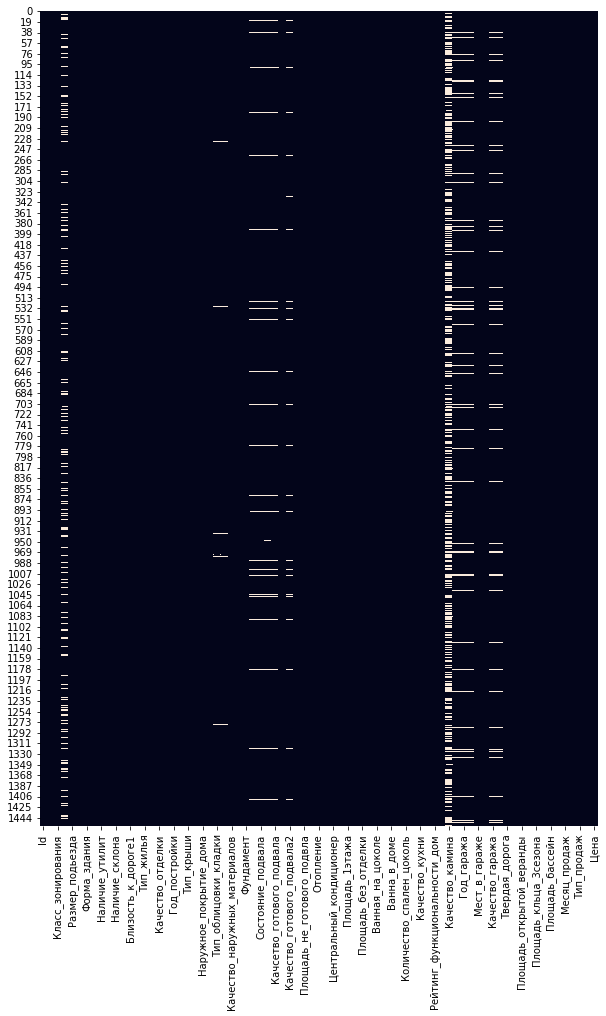

In [ ]:
import seaborn as sns
from matplotlib.pyplot import figure
figure(figsize = (10, 15))
sns.heatmap(df_house.isnull(), cbar=False)

In [ ]:
df_house.info() # Проверяем значение каждой колонки должны иметь заданный тип данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Id                                   1460 non-null   int64  
 1   Класс_здания                         1460 non-null   int64  
 2   Класс_зонирования                    1460 non-null   object 
 3   Количество_подьездов_кзданию         1201 non-null   float64
 4   Размер_подьезда                      1460 non-null   int64  
 5   Тип_улицы                            1460 non-null   object 
 6   Форма_здания                         1460 non-null   object 
 7   Выровненность_здания                 1460 non-null   object 
 8   Наличие_утилит                       1460 non-null   object 
 9   Конфигурация                         1460 non-null   object 
 10  Наличие_склона                       1460 non-null   object 
 11  Район                         

In [ ]:
colum_num_list = [3, 24, 25, 29, 30, 31, 32, 34, 41, 56, 57, 58, 59, 62, 63] # список номеров столбцов которые необходимо заполнить.
for colum_num in colum_num_list: # пройдемся в цикле по всем столбцам.
    maskValue = df_house.iloc[:,colum_num].isna() # создаем маску с пустыми значениями для колонки.
    df_val = df_house.loc[maskValue,:] # создаем вспомогательным датафрейм.
    list_val = df_val.iloc[:,[1, 11, 18]].values.tolist() # переводим для того, что бы пробежаться по значениям.
    list_value =[Value_string_det(a1,a2,a3,colum_num) for a1,a2,a3 in list_val] # создадим вспомогательный список со значениям поля.
    df_val.loc[:,'New'] = list_value # присвоим новой колонке значения списка с рассчитанными значениями. 
    df_house.iloc[:,colum_num].fillna(value=df_val.iloc[:,15],inplace=True) # заполняем все значения поля, имеющие пустые значения.

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
df_house

,Id,Класс_здания,Класс_зонирования,Количество_подьездов_кзданию,Размер_подьезда,Тип_улицы,Форма_здания,Выровненность_здания,Наличие_утилит,Конфигурация,Наличие_склона,Район,Близость_к_дороге1,Близость_к_дороге2,Тип_жилья,Тип_дома,Качество_отделки,Общее_состояние,Год_постройки,Год_ремонта,Тип_крыши,Материал_крыши,Наружное_покрытие_дома,Наружное_покрытие_дома_2,Тип_облицовки_кладки,Площадь_облицовки_каменной_кладкой,Качество_наружных_материалов,Текущее_состояние_материала_снаружи,Фундамент,Высота_подвала,Состояние_подвала,Выход_на_уровне_сада,Качсетво_готового_подвала,Площадь_готового_подвала,Качество_готового_подвала2,Площадь_готового_подвла2,Площадь_не_готового_подвла,Общая_Площадь_подвала,Отопление,Сосотояние_Отопления,Центральный_кондиционер,Электричество,Площадь_1этажа,Площадь_2этажа,Площадь_без_отделки,Площадь_выше_земли,Ванная_на_цоколе,Душ_цоколь,Ванна_в_доме,Душ_в_доме,Количество_спален_цоколь,Кухни,Качество_кухни,Количество_комнат_дом,Рейтинг_функциональности_дом,Камин,Качество_камина,Тип_гаража,Год_гаража,Отделка_гаража,Мест_в_гараже,Площадь_гараж,Качество_гаража,Состояние_гаража,Твердая_дорога,Площадь_деревянного_настила,Площадь_открытой_веранды,Площадь_закрытого_крыльца,Площадь_кльца_3сезона,Площадь_крыльца,Площадь_бассейн,Забор,Месяц_продаж,Год_продаж,Тип_продаж,Состояние_продажи,Цена
0,1,60,RL,65,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,2Story,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,MnPrv,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,MnPrv,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,MnPrv,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,MnPrv,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,MnPrv,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,GdPrv,8,2007,WD,Normal,175000
1456,1457,20,RL,85,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,MnPrv,2,2010,WD,Normal,210000
1457,1458,70,RL,66,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,11

In [ ]:
df_house.info() # Проверяем значение каждой колонки должны иметь заданный тип данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Id                                   1460 non-null   int64 
 1   Класс_здания                         1460 non-null   int64 
 2   Класс_зонирования                    1460 non-null   object
 3   Количество_подьездов_кзданию         1460 non-null   object
 4   Размер_подьезда                      1460 non-null   int64 
 5   Тип_улицы                            1460 non-null   object
 6   Форма_здания                         1460 non-null   object
 7   Выровненность_здания                 1460 non-null   object
 8   Наличие_утилит                       1460 non-null   object
 9   Конфигурация                         1460 non-null   object
 10  Наличие_склона                       1460 non-null   object
 11  Район                                1460 n

In [ ]:
# запишем заполненную базу данных в файл
df_house.to_csv('/content/drive/MyDrive/datasets/house-prices-advanced-regression-techniques/df_house.csv', sep=',', index=False)

In [ ]:
# считаем заполненную базу данных из файла
df_house = pd.read_csv('/content/drive/MyDrive/datasets/house-prices-advanced-regression-techniques/df_house.csv')

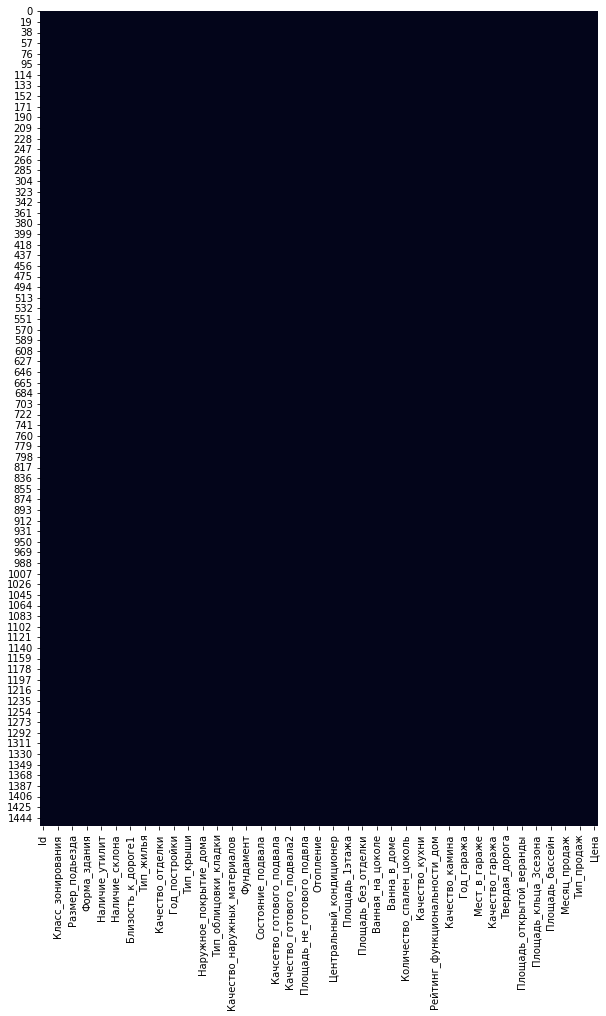

In [ ]:
import seaborn as sns
from matplotlib.pyplot import figure
figure(figsize = (10, 15))
sns.heatmap(df_house.isnull(), cbar=False)

In [ ]:
 # перечень столбцов которые необходимо переводить в числовые значения
colum_num_list = [2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 38, 39, 40, 41, 52, 54, 56, 57, 58, 59, 62, 63, 64, 71, 74, 75]
 # список уникальных значений для каждого текстового столбца
name_list = [0,0,0,0,0,0,0,0,0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
for i, n_l in enumerate(colum_num_list):
    name_list[i] = df_house.iloc[:,n_l].unique().tolist()
    print(len(name_list[i]))


5
117
2
4
4
2
5
3
25
9
8
5
8
6
8
15
16
6
329
4
5
6
8
8
8
10
10
6
5
2
6
4
7
13
13
104
10
12
12
3
4
9
6


In [ ]:
# заполняем данные и переводим текчтовые данные в числовые 
def get_Data(item_list):
    xTrain = []
    yTrain = []
    for item in item_list:
        stroka = []
        for i, n_l in enumerate(colum_num_list):
            # переводим текстовые значения в числовые путем присвоения индекса уникальности. 
            stroka.append(name_list[i].index(item[n_l])) 
        for i in (0,1,4,16,17,18,19,33,35,36,37,42,43,44,45,46,47,48,49,50,51,53,55,60,61,65,66,67,68,69,70,72,73):
            # вставляем значения которые осталичь без изменения.
            stroka.insert(i,item[i]) 
        yTrain.append(item[76])  # добавляем массив  ответов на основе 11 столбца "Цена" 
        xTrain.append(stroka) # добавляем массив параметров на основе сформированных данных
    xTrain = np.array(xTrain, dtype=np.float) # переводим к единому типу и в формат numpy
    yTrain = np.array(yTrain, dtype=np.float)
    return (xTrain, yTrain)


In [ ]:
(xTrain, yTrain) = get_Data(df_house.values) # Извлекаем значения загруженного набора данных

In [ ]:
# Размер набора параметров и стоимость автомобиля
print(xTrain.shape) 
print(yTrain.shape)
# Пример обработанных данных
n = 1256 
print(xTrain[n])
print(yTrain[n])

(1460, 76)
(1460,)
[1.2570e+03 2.0000e+01 0.0000e+00 1.2000e+01 1.4303e+04 0.0000e+00
 1.0000e+00 0.0000e+00 0.0000e+00 2.0000e+00 0.0000e+00 3.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00 8.0000e+00 5.0000e+00
 1.9940e+03 1.9940e+03 1.0000e+00 0.0000e+00 3.0000e+00 3.0000e+00
 0.0000e+00 2.9200e+02 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 1.0000e+00 0.0000e+00 1.3140e+03 0.0000e+00 0.0000e+00
 6.7200e+02 1.9860e+03 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 1.9870e+03 0.0000e+00 0.0000e+00 1.9870e+03 1.0000e+00 0.0000e+00
 2.0000e+00 0.0000e+00 2.0000e+00 1.0000e+00 0.0000e+00 7.0000e+00
 0.0000e+00 1.0000e+00 1.0000e+00 0.0000e+00 7.9000e+01 2.0000e+00
 2.0000e+00 6.9100e+02 0.0000e+00 0.0000e+00 0.0000e+00 2.6200e+02
 3.6000e+01 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 2.0000e+00
 8.0000e+00 2.0080e+03 0.0000e+00 0.0000e+00]
301500.0


In [ ]:
test.info() # Проверяем значение каждой колонки должны иметь заданный тип данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 76 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Id                                   1459 non-null   int64  
 1   Класс_здания                         1459 non-null   int64  
 2   Класс_зонирования                    1455 non-null   object 
 3   Количество_подьездов_кзданию         1232 non-null   float64
 4   Размер_подьезда                      1459 non-null   int64  
 5   Тип_улицы                            1459 non-null   object 
 6   Форма_здания                         1459 non-null   object 
 7   Выровненность_здания                 1459 non-null   object 
 8   Наличие_утилит                       1457 non-null   object 
 9   Конфигурация                         1459 non-null   object 
 10  Наличие_склона                       1459 non-null   object 
 11  Район                         

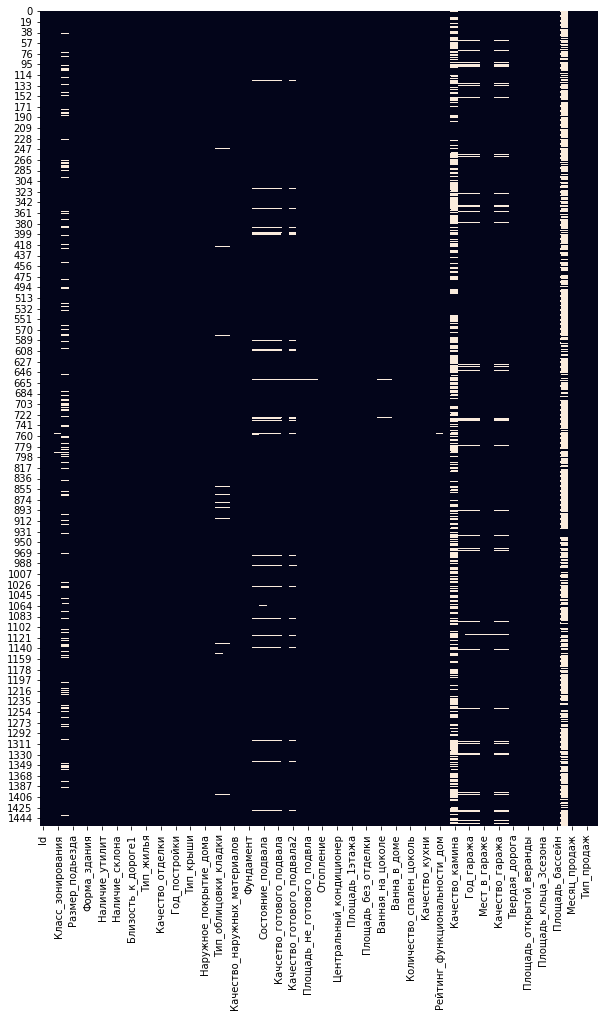

In [ ]:
import seaborn as sns
from matplotlib.pyplot import figure
figure(figsize = (10, 15))
sns.heatmap(test.isnull(), cbar=False)

In [ ]:
# Заполняем колонки с пустыми значениями.
maskValue1 = test.iloc[:,-5].isna() # создаем маску с пустыми значениями для колонки "Забор"
df_val1 = test.loc[maskValue1,:] # создаем вспомогательным датафрейм
print(df_val1.shape) # выведем размерность этого датафрейма
df_val1.head(10) # выведем на экран строки с пустыми значениями для колонки "Забор"

(1169, 76)


,Id,Класс_здания,Класс_зонирования,Количество_подьездов_кзданию,Размер_подьезда,Тип_улицы,Форма_здания,Выровненность_здания,Наличие_утилит,Конфигурация,Наличие_склона,Район,Близость_к_дороге1,Близость_к_дороге2,Тип_жилья,Тип_дома,Качество_отделки,Общее_состояние,Год_постройки,Год_ремонта,Тип_крыши,Материал_крыши,Наружное_покрытие_дома,Наружное_покрытие_дома_2,Тип_облицовки_кладки,Площадь_облицовки_каменной_кладкой,Качество_наружных_материалов,Текущее_состояние_материала_снаружи,Фундамент,Высота_подвала,Состояние_подвала,Выход_на_уровне_сада,Качсетво_готового_подвала,Площадь_готового_подвала,Качество_готового_подвала2,Площадь_готового_подвла2,Площадь_не_готового_подвла,Общая_Площадь_подвала,Отопление,Сосотояние_Отопления,Центральный_кондиционер,Электричество,Площадь_1этажа,Площадь_2этажа,Площадь_без_отделки,Площадь_выше_земли,Ванная_на_цоколе,Душ_цоколь,Ванна_в_доме,Душ_в_доме,Количество_спален_цоколь,Кухни,Качество_кухни,Количество_комнат_дом,Рейтинг_функциональности_дом,Камин,Качество_камина,Тип_гаража,Год_гаража,Отделка_гаража,Мест_в_гараже,Площадь_гараж,Качество_гаража,Состояние_гаража,Твердая_дорога,Площадь_деревянного_настила,Площадь_открытой_веранды,Площадь_закрытого_крыльца,Площадь_кльца_3сезона,Площадь_крыльца,Площадь_бассейн,Забор,Месяц_продаж,Год_продаж,Тип_продаж,Состояние_продажи
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,6,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,763.0,763.0,GasA,Gd,Y,SBrkr,763,892,0,1655,0.0,0.0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1993.0,Fin,2.0,440.0,TA,TA,Y,157,84,0,0,0,0,NaN,4,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1998,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,789.0,789.0,GasA,Gd,Y,SBrkr,789,676,0,1465,0.0,0.0,2,1,3,1,TA,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,393.0,TA,TA,Y,0,75,0,0,0,0,NaN,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,7,5,1990,1990,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,PConc,Gd,TA,Gd,GLQ,637.0,Unf,0.0,663.0,1300.0,GasA,Gd,Y,SBrkr,1341,0,0,1341,1.0,0.0,1,1,2,1,Gd,5,Typ,1,Po,Attchd,1990.0,Unf,2.0,506.0,TA,TA,Y,192,0,0,0,0,0,NaN,2,2010,WD,Normal
10,1471,120,RH,26.0,5858,Pave,IR1,Lvl,AllPub,FR2,Gtl,NAmes,Norm,Norm,TwnhsE,1Story,7,5,1999,1999,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,1051.0,BLQ,0.0,354.0,1405.0,GasA,Ex,Y,SBrkr,1337,0,0,1337,1.0,0.0,2,0,2,1,Gd,5,Typ,1,Fa,Attchd,1999.0,Fin,2.0,511.0,TA,TA,Y,203,68,0,0,0,0,NaN,6,2010,WD,Normal
11,1472,160,RM,21.0,1680,Pave,Reg,Lvl,AllPub,Inside,Gtl,BrDale,Norm,Norm,Twnhs,2Story,6,5,1971,1971,Gable,CompShg,HdBoard,HdBoard,BrkFace,504.0,TA,TA,CBlock,TA,TA,No,Rec,156.0,Unf,0.0,327.0,483.0,GasA,TA,Y,SBrkr,483,504,0,987,0.0,0.0,1,1,2,1,TA,5,Typ,0,NaN,Detchd,1971.0,Unf,1.0,264.0,TA,TA,Y,275,0,0,0,0,0,NaN,2,2010,COD,Normal
12,1473,160,RM,21.0,1680,Pave,Reg,Lvl,AllPub,Inside,Gtl,BrDale,Norm,Norm,Twnhs,2Story,5,5,1971,1971,Gab

In [ ]:
#  Забор
colum_num = 71
# создадим вспомогательную функцию для определния значения объема по 3 параметрам 
def Value_string_det1 (a1,a2,a3,n_columns):
    try: # пробуем получить значение по трем ключевым значениям 'Класс здания', 'Район', 'Год'
        answ1 = test.iloc[(test[((test.iloc[:,1] == a1) & (test.iloc[:,11] == a2) & (test.iloc[:,18] == a3))]).index,\
                            n_columns ].value_counts().index[0]
    except:
        try: # в случае если операция не дала результа определяем значение поля на основе 'Класс здания' и максимально частоты использования. 
            answ1 = test.iloc[(test[test.iloc[:,1] == a1]).index,n_columns].value_counts().index[0]
        except: # в случае если с помощью предыдущих операций, мы не получили результат, то возвращаем значение, чаще встречающееся по все базе
            answ1 = test.iloc[:,n_columns].value_counts().index[0]
    
    return answ1


In [ ]:
maskValue1 = test.iloc[:,colum_num].isna() # создаем маску с пустыми значениями для колонки "Забор"
df_val1 = test.loc[maskValue1,:] # создаем вспомогательным датафрейм
print(df_val1.shape) # выведем размерность этого дата фрейма
df_val1.head(10) # выведем на экран строки с пустыми значениями для колонки "Забор"

(1169, 76)


,Id,Класс_здания,Класс_зонирования,Количество_подьездов_кзданию,Размер_подьезда,Тип_улицы,Форма_здания,Выровненность_здания,Наличие_утилит,Конфигурация,Наличие_склона,Район,Близость_к_дороге1,Близость_к_дороге2,Тип_жилья,Тип_дома,Качество_отделки,Общее_состояние,Год_постройки,Год_ремонта,Тип_крыши,Материал_крыши,Наружное_покрытие_дома,Наружное_покрытие_дома_2,Тип_облицовки_кладки,Площадь_облицовки_каменной_кладкой,Качество_наружных_материалов,Текущее_состояние_материала_снаружи,Фундамент,Высота_подвала,Состояние_подвала,Выход_на_уровне_сада,Качсетво_готового_подвала,Площадь_готового_подвала,Качество_готового_подвала2,Площадь_готового_подвла2,Площадь_не_готового_подвла,Общая_Площадь_подвала,Отопление,Сосотояние_Отопления,Центральный_кондиционер,Электричество,Площадь_1этажа,Площадь_2этажа,Площадь_без_отделки,Площадь_выше_земли,Ванная_на_цоколе,Душ_цоколь,Ванна_в_доме,Душ_в_доме,Количество_спален_цоколь,Кухни,Качество_кухни,Количество_комнат_дом,Рейтинг_функциональности_дом,Камин,Качество_камина,Тип_гаража,Год_гаража,Отделка_гаража,Мест_в_гараже,Площадь_гараж,Качество_гаража,Состояние_гаража,Твердая_дорога,Площадь_деревянного_настила,Площадь_открытой_веранды,Площадь_закрытого_крыльца,Площадь_кльца_3сезона,Площадь_крыльца,Площадь_бассейн,Забор,Месяц_продаж,Год_продаж,Тип_продаж,Состояние_продажи
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,6,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,763.0,763.0,GasA,Gd,Y,SBrkr,763,892,0,1655,0.0,0.0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1993.0,Fin,2.0,440.0,TA,TA,Y,157,84,0,0,0,0,NaN,4,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1998,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,789.0,789.0,GasA,Gd,Y,SBrkr,789,676,0,1465,0.0,0.0,2,1,3,1,TA,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,393.0,TA,TA,Y,0,75,0,0,0,0,NaN,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,7,5,1990,1990,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,PConc,Gd,TA,Gd,GLQ,637.0,Unf,0.0,663.0,1300.0,GasA,Gd,Y,SBrkr,1341,0,0,1341,1.0,0.0,1,1,2,1,Gd,5,Typ,1,Po,Attchd,1990.0,Unf,2.0,506.0,TA,TA,Y,192,0,0,0,0,0,NaN,2,2010,WD,Normal
10,1471,120,RH,26.0,5858,Pave,IR1,Lvl,AllPub,FR2,Gtl,NAmes,Norm,Norm,TwnhsE,1Story,7,5,1999,1999,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,1051.0,BLQ,0.0,354.0,1405.0,GasA,Ex,Y,SBrkr,1337,0,0,1337,1.0,0.0,2,0,2,1,Gd,5,Typ,1,Fa,Attchd,1999.0,Fin,2.0,511.0,TA,TA,Y,203,68,0,0,0,0,NaN,6,2010,WD,Normal
11,1472,160,RM,21.0,1680,Pave,Reg,Lvl,AllPub,Inside,Gtl,BrDale,Norm,Norm,Twnhs,2Story,6,5,1971,1971,Gable,CompShg,HdBoard,HdBoard,BrkFace,504.0,TA,TA,CBlock,TA,TA,No,Rec,156.0,Unf,0.0,327.0,483.0,GasA,TA,Y,SBrkr,483,504,0,987,0.0,0.0,1,1,2,1,TA,5,Typ,0,NaN,Detchd,1971.0,Unf,1.0,264.0,TA,TA,Y,275,0,0,0,0,0,NaN,2,2010,COD,Normal
12,1473,160,RM,21.0,1680,Pave,Reg,Lvl,AllPub,Inside,Gtl,BrDale,Norm,Norm,Twnhs,2Story,5,5,1971,1971,Gab

In [ ]:
list_val1 = df_val1.iloc[:,[1, 11, 18]].values.tolist() # переводим для того, что бы пробежаться по значениям.
list_value1 =[Value_string_det1(a1,a2,a3,colum_num) for a1,a2,a3 in list_val1] # создадим вспомогательный список со значениям поля "Забор".
df_val1.loc[:,'New1'] = list_value1 # присвоим новой колонке значения списка с рассчитанными значениями. 

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [ ]:
test.iloc[:,colum_num].fillna(value=df_val1.iloc[:,76],inplace=True) # заполняем все значения поля "Забор", имеющие пустые значения.

In [ ]:
test

,Id,Класс_здания,Класс_зонирования,Количество_подьездов_кзданию,Размер_подьезда,Тип_улицы,Форма_здания,Выровненность_здания,Наличие_утилит,Конфигурация,Наличие_склона,Район,Близость_к_дороге1,Близость_к_дороге2,Тип_жилья,Тип_дома,Качество_отделки,Общее_состояние,Год_постройки,Год_ремонта,Тип_крыши,Материал_крыши,Наружное_покрытие_дома,Наружное_покрытие_дома_2,Тип_облицовки_кладки,Площадь_облицовки_каменной_кладкой,Качество_наружных_материалов,Текущее_состояние_материала_снаружи,Фундамент,Высота_подвала,Состояние_подвала,Выход_на_уровне_сада,Качсетво_готового_подвала,Площадь_готового_подвала,Качество_готового_подвала2,Площадь_готового_подвла2,Площадь_не_готового_подвла,Общая_Площадь_подвала,Отопление,Сосотояние_Отопления,Центральный_кондиционер,Электричество,Площадь_1этажа,Площадь_2этажа,Площадь_без_отделки,Площадь_выше_земли,Ванная_на_цоколе,Душ_цоколь,Ванна_в_доме,Душ_в_доме,Количество_спален_цоколь,Кухни,Качество_кухни,Количество_комнат_дом,Рейтинг_функциональности_дом,Камин,Качество_камина,Тип_гаража,Год_гаража,Отделка_гаража,Мест_в_гараже,Площадь_гараж,Качество_гаража,Состояние_гаража,Твердая_дорога,Площадь_деревянного_настила,Площадь_открытой_веранды,Площадь_закрытого_крыльца,Площадь_кльца_3сезона,Площадь_крыльца,Площадь_бассейн,Забор,Месяц_продаж,Год_продаж,Тип_продаж,Состояние_продажи
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,MnPrv,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,MnPrv,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,MnPrv,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,MnPrv,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,MnPrv,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,GdPrv,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,GdPrv,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,

In [ ]:
test.info() # Проверяем значение каждой колонки должны иметь заданный тип данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 76 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Id                                   1459 non-null   int64  
 1   Класс_здания                         1459 non-null   int64  
 2   Класс_зонирования                    1455 non-null   object 
 3   Количество_подьездов_кзданию         1232 non-null   float64
 4   Размер_подьезда                      1459 non-null   int64  
 5   Тип_улицы                            1459 non-null   object 
 6   Форма_здания                         1459 non-null   object 
 7   Выровненность_здания                 1459 non-null   object 
 8   Наличие_утилит                       1457 non-null   object 
 9   Конфигурация                         1459 non-null   object 
 10  Наличие_склона                       1459 non-null   object 
 11  Район                         

In [ ]:
colum_num_list1 = [2,3,8,22,23,24,25,29,30,31,32,33,34,35,36,37,46,47,52,54,56,57,58,59,60,61,62,63,74] # список номеров столбцов которые необходимо заполнить.
for colum_num in colum_num_list1: # пройдемся в цикле по всем столбцам.
    maskValue1 = test.iloc[:,colum_num].isna() # создаем маску с пустыми значениями для колонки.
    df_val1 = test.loc[maskValue1,:] # создаем вспомогательным датафрейм.
    list_val1 = df_val1.iloc[:,[1, 11, 18]].values.tolist() # переводим для того, что бы пробежаться по значениям.
    list_value1 =[Value_string_det1(a1,a2,a3,colum_num) for a1,a2,a3 in list_val1] # создадим вспомогательный список со значениям поля.
    df_val1.loc[:,'New'] = list_value1 # присвоим новой колонке значения списка с рассчитанными значениями. 
    test.iloc[:,colum_num].fillna(value=df_val1.iloc[:,15],inplace=True) # заполняем все значения поля, имеющие пустые значения.

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
test.info() # Проверяем значение каждой колонки должны иметь заданный тип данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 76 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Id                                   1459 non-null   int64 
 1   Класс_здания                         1459 non-null   int64 
 2   Класс_зонирования                    1459 non-null   object
 3   Количество_подьездов_кзданию         1459 non-null   object
 4   Размер_подьезда                      1459 non-null   int64 
 5   Тип_улицы                            1459 non-null   object
 6   Форма_здания                         1459 non-null   object
 7   Выровненность_здания                 1459 non-null   object
 8   Наличие_утилит                       1459 non-null   object
 9   Конфигурация                         1459 non-null   object
 10  Наличие_склона                       1459 non-null   object
 11  Район                                1459 n

In [ ]:
# перечень столбцов которые необходимо переводить в числовые значения
colum_num_list = [2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 46, 47, 52, 54, 56, 57, 58, 59, 60, 61, 62, 63, 64, 71, 74, 75]
 # список уникальных значений для каждого текстового столбца
name_list = [0,0,0,0,0,0,0,0,0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
for i, n_l in enumerate(colum_num_list):
    name_list[i] = test.iloc[:,n_l].unique().tolist()
    print(len(name_list[i]))

7
121
2
4
4
2
5
3
25
9
5
5
7
6
4
14
16
7
306
4
5
6
8
8
8
10
670
10
162
794
737
4
5
2
4
5
4
5
9
12
12
103
9
7
460
10
11
3
4
10
6


In [ ]:
# заполняем данные и переводим текчтовые данные в числовые 
def get_Data_test(item_list):
    xTest = []
    
    for item in item_list:
        stroka = []
        for i, n_l in enumerate(colum_num_list):
            # переводим текстовые значения в числовые путем присвоения индекса уникальности. 
            stroka.append(name_list[i].index(item[n_l])) 
        for i in (0,1,4,16,17,18,19,42,43,44,45,48,49,50,51,53,55,65,66,67,68,69,70,72,73):
            # вставляем значения которые осталичь без изменения.
            stroka.insert(i,item[i]) 
        
        xTest.append(stroka) # добавляем массив параметров на основе сформированных данных
    xTest = np.array(xTest, dtype=np.float) # переводим к единому типу и в формат numpy
    
    return (xTest)

In [ ]:
(xTest) = get_Data_test(test.values) # Извлекаем значения загруженного набора данных

In [ ]:
# Размер набора параметров и стоимость автомобиля
print(xTest.shape) 

# Пример обработанных данных
n = 1256 
print(xTest[n])


(1459, 76)
[2.717e+03 6.000e+01 3.000e+00 1.170e+02 8.314e+03 0.000e+00 1.000e+00
 0.000e+00 0.000e+00 1.000e+00 0.000e+00 8.000e+00 1.000e+00 0.000e+00
 0.000e+00 1.000e+00 7.000e+00 5.000e+00 1.997e+03 1.998e+03 1.000e+00
 0.000e+00 1.000e+00 1.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00
 1.000e+00 1.000e+00 0.000e+00 0.000e+00 3.000e+00 5.000e+00 1.000e+00
 1.000e+00 6.130e+02 6.800e+02 0.000e+00 2.000e+00 0.000e+00 0.000e+00
 8.540e+02 8.400e+02 0.000e+00 1.694e+03 0.000e+00 0.000e+00 2.000e+00
 1.000e+00 3.000e+00 1.000e+00 1.000e+00 6.000e+00 0.000e+00 1.000e+00
 1.000e+00 2.000e+00 2.000e+00 0.000e+00 0.000e+00 1.290e+02 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 3.820e+02 0.000e+00 0.000e+00 1.100e+02
 0.000e+00 1.000e+00 1.100e+01 2.006e+03 0.000e+00 0.000e+00]


In [ ]:
# нормализуем данные, на вход должно подаваться в каждой цифре не больше 1 по величине (от 0 до 1 - обычно), иначе сеть плохо учится
xScaler = MinMaxScaler() # используем функцию нормализации
xTrainScaled = xScaler.fit_transform(xTrain) # сначала обучаем на тренировочных данных, потом трансформируем их

yScaler = MinMaxScaler() # Скармливаем объекту двумерный вектор
yTrainScaled = yScaler.fit_transform(yTrain.reshape(-1,1)).flatten() # Нормализуем по нормальному распределению

In [ ]:
xScaler = MinMaxScaler() # используем функцию нормализации
xTestScaled = xScaler.fit_transform(xTest) # сначала обучаем на тренировочных данных, потом трансформируем их

In [ ]:
# sklearn - библиотека для машинного обучения
# train_test_split - метод разделения на обучающую и тестовую выборку
# test_size=0.15 - будет выделено 15% от тренировочных данных 
# shuffle=True - перемешать данные
# x_train - данные для обучения, y_train - правильные ответы для обучения
# x_test - данные для проверки, y_test - правильные ответы для проверки

x_train, x_test, y_train, y_test = train_test_split(xTrainScaled, yTrainScaled, test_size=0.15, shuffle=True)    
print (x_train.shape)
print (x_test.shape)
print (y_train.shape)
print (y_test.shape)

(1241, 76)
(219, 76)
(1241,)
(219,)


In [ ]:
# Создадим модель
def createModelHouse(input_my):
    model = Sequential()
    model.add(BatchNormalization(input_shape=(input_my,)))
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(1000, activation='tanh'))
    model.add(Dense(800, activation='tanh'))
    #model.add(BatchNormalization())
    #model.add(Dropout(0.2))
    model.add(Dense(600, activation='tanh'))
    model.add(Dense(400, activation='tanh'))
    #model.add(BatchNormalization())
    #model.add(Dropout(0.1))
    model.add(Dense(200, activation='tanh'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(1, activation='linear'))
    # model.compile(optimizer=Adam(lr=1e-3), loss='mse', metrics=['accuracy'])

    model.compile(optimizer=Adam(lr=1e-5), loss='mse', metrics=['mae'])
    return model

In [ ]:
# Обучаем модель полученными данными
modelHouse = createModelHouse(x_train.shape[1])
history = modelHouse.fit(x_train, 
                    y_train, 
                    epochs=500, 
                    batch_size=100,
                    validation_split=0.15, 
                    verbose=1)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/500
11/11 [==============================] - 2s 61ms/step - loss: 0.1355 - mae: 0.2911 - val_loss: 0.0098 - val_mae: 0.0737
Epoch 2/500
11/11 [==============================] - 0s 40ms/step - loss: 0.0758 - mae: 0.2157 - val_loss: 0.0072 - val_mae: 0.0647
Epoch 3/500
11/11 [==============================] - 0s 38ms/step - loss: 0.0528 - mae: 0.1828 - val_loss: 0.0076 - val_mae: 0.0663
Epoch 4/500
11/11 [==============================] - 0s 39ms/step - loss: 0.0446 - mae: 0.1682 - val_loss: 0.0079 - val_mae: 0.0676
Epoch 5/500
11/11 [==============================] - 0s 39ms/step - loss: 0.0387 - mae: 0.1547 - val_loss: 0.0077 - val_mae: 0.0664
Epoch 6/500
11/11 [==============================] - 0s 38ms/step - loss: 0.0323 - mae: 0.1424 - val_loss: 0.0076 - val_mae: 0.0660
Epoch 7/500
11/11 [==============================] - 0s 38ms/step - loss: 0.0286 - mae: 0.1352 - val_loss: 0.0094 - val_mae: 0.0735
Epoch 8/500
11/11 [==============================] - 0s 38ms/step - loss: 0.

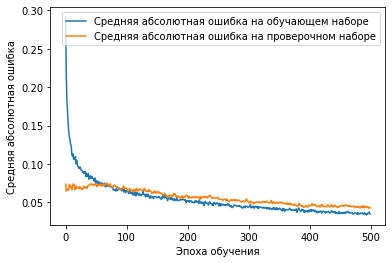

In [ ]:
plt.plot(history.history['mae'], 
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_mae'], 
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Средняя абсолютная ошибка')
plt.legend()
plt.show()

In [ ]:
modelHouse.save('/content/drive/MyDrive/datasets/house-prices-advanced-regression-techniques/my_modelHouse.h5') # сохраним обученную модель

In [ ]:
modelHouse = load_model('/content/drive/MyDrive/datasets/house-prices-advanced-regression-techniques/my_modelHouse.h5') # При необходимости загрузить обученную модель

In [ ]:
print(x_test.shape)

(219, 76)


In [ ]:
prediction_house = modelHouse.predict(x_test) # сделаем предсказание нашей моделью тестовой выборки
predUnscaled = yScaler.inverse_transform(prediction_house).flatten() # приведем предсказания к начальному виду до нормирования
y_testUnscaled = yScaler.inverse_transform(y_test.reshape(1,-1)).flatten()# приведем y_test к начальному виду до нормирования
# Среднее значение ошибки 
delta = abs(predUnscaled - y_testUnscaled)
print('Среднее значение ошибки ',sum(delta) / len(delta))

Среднее значение ошибки  18635.880270761987


In [ ]:
prediction_house = modelHouse.predict(xTest) # сделаем предсказание нашей моделью тестовой выборки
predUnscaled = yScaler.inverse_transform(prediction_house).flatten() # приведем предсказания к начальному виду до нормирования
#y_testUnscaled = yScaler.inverse_transform(y_test.reshape(1,-1)).flatten()# приведем y_test к начальному виду до нормирования
# Среднее значение ошибки 
#delta = abs(predUnscaled - y_testUnscaled)
#print('Среднее значение ошибки ',sum(delta) / len(delta))

In [ ]:
predUnscaled

array([257625.69, 271864.62, 308545.53, ..., 269398.62, 296377.22,
       307526.97], dtype=float32)

In [ ]:
output=pd.DataFrame({'Id': test.Id,
                       'SalePrice': predUnscaled})
output.to_csv('submission.csv', index=False)

output.head()

,Id,SalePrice
0,1461,257625.68750
1,1462,271864.62500
2,1463,308545.53125
3,1464,225537.46875
4,1465,86076.62500
